In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from utils import (load_dataset, save_dataset)

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [4]:
df_train = load_dataset('train')
df_test = load_dataset('test')

In [5]:
df_train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [8]:
df_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
df_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [10]:
df_test['Is_Lead'] = -1
df_full = pd.concat([df_train,df_test],axis=0,ignore_index=True)

In [11]:
df_full.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         41847
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [12]:
df_full['CreditProductMissing'] = np.where(df_full['Credit_Product'].isnull(),1,0)

In [13]:
df_full.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,CreditProductMissing
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,0


In [14]:
df_full[df_full['Is_Lead']!=-1]['Is_Lead'].value_counts()/len(df_train)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

In [15]:
for cols in df_full.columns:
    print(cols,len(df_full[cols].unique()))

ID 351037
Gender 2
Age 63
Region_Code 35
Occupation 4
Channel_Code 4
Vintage 66
Credit_Product 3
Avg_Account_Balance 162137
Is_Active 2
Is_Lead 3
CreditProductMissing 2


<AxesSubplot:xlabel='Gender'>

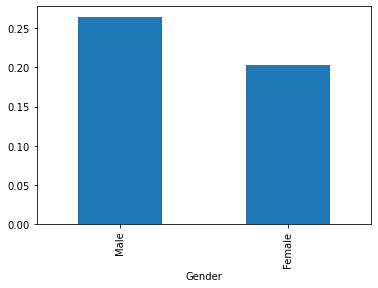

In [16]:
df_train.groupby('Gender')['Is_Lead'].mean().sort_values(ascending=False).plot.bar()

In [17]:
df_full.groupby('CreditProductMissing')['Gender'].value_counts()/len(df_full)

CreditProductMissing  Gender
0                     Male      0.472175
                      Female    0.408615
1                     Male      0.074496
                      Female    0.044713
Name: Gender, dtype: float64

<AxesSubplot:>

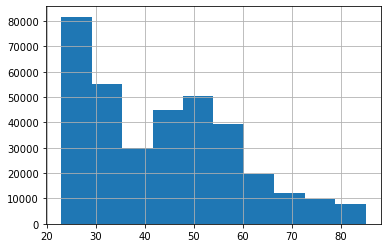

In [18]:
df_full['Age'].hist()

<AxesSubplot:>

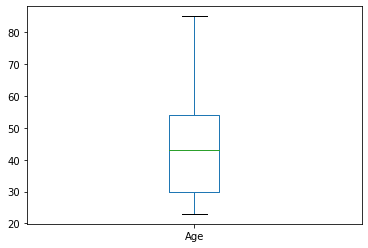

In [19]:
df_full['Age'].plot.box()

<AxesSubplot:xlabel='Is_Lead'>

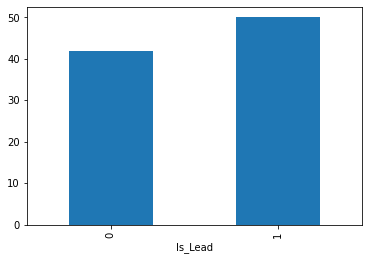

In [20]:
df_train.groupby('Is_Lead')['Age'].mean().plot.bar()

<AxesSubplot:>

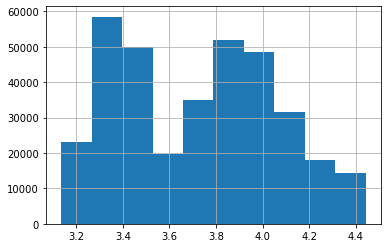

In [21]:
np.log(df_full['Age']).hist()

In [22]:
df_full['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [23]:
len(df_full['Region_Code'].unique()) == len(df_train['Region_Code'].unique())

True

In [24]:
df_full['Region_Code'].value_counts().sort_values(ascending=False)/len(df_full)

RG268    0.145452
RG283    0.120492
RG254    0.109894
RG284    0.078319
RG277    0.052479
RG280    0.052143
RG270    0.031792
RG269    0.031766
RG261    0.031105
RG257    0.024752
RG251    0.024579
RG282    0.023263
RG272    0.021622
RG274    0.021348
RG281    0.020616
RG273    0.017947
RG252    0.017369
RG279    0.015884
RG263    0.015104
RG275    0.013184
RG260    0.012563
RG256    0.011512
RG264    0.011492
RG276    0.011250
RG259    0.010506
RG250    0.010096
RG255    0.008287
RG258    0.007871
RG253    0.007600
RG278    0.007538
RG262    0.007372
RG265    0.006307
RG266    0.006293
RG271    0.006256
RG267    0.005951
Name: Region_Code, dtype: float64

<AxesSubplot:xlabel='Region_Code'>

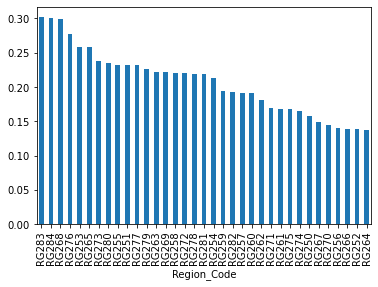

In [25]:
df_train.groupby('Region_Code')['Is_Lead'].mean().sort_values(ascending=False).plot.bar()

In [26]:
df_full['Occupation'].value_counts()

Self_Employed    144078
Salaried         102912
Other            100304
Entrepreneur       3743
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation'>

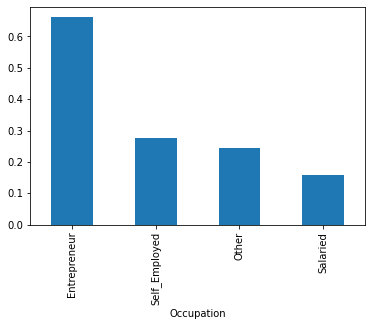

In [27]:
df_train.groupby('Occupation')['Is_Lead'].mean().sort_values(ascending=False).plot.bar()

In [28]:
df_full['Channel_Code'].value_counts()

X1    148202
X3     97981
X2     96902
X4      7952
Name: Channel_Code, dtype: int64

<AxesSubplot:xlabel='Channel_Code'>

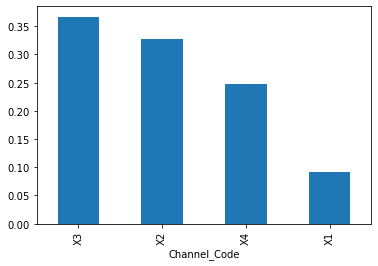

In [29]:
df_train.groupby('Channel_Code')['Is_Lead'].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

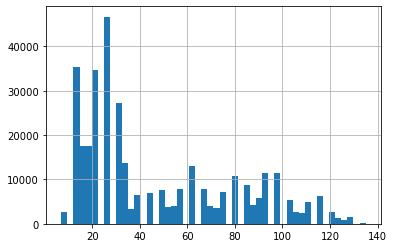

In [30]:
df_full['Vintage'].hist(bins=50)

<AxesSubplot:>

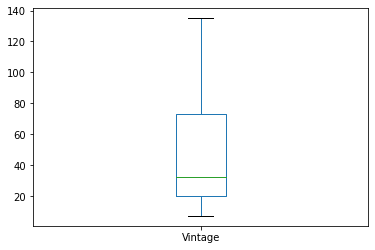

In [31]:
df_full['Vintage'].plot.box()

<AxesSubplot:>

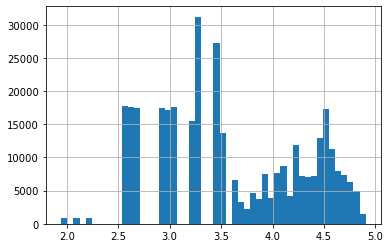

In [32]:
np.log(df_full['Vintage']).hist(bins=50)

<AxesSubplot:xlabel='Is_Lead'>

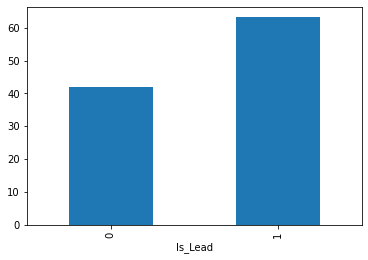

In [33]:
df_train.groupby('Is_Lead')['Vintage'].mean().plot.bar()

In [34]:
df_full['Credit_Product'].value_counts(dropna=False)/len(df_full)

No     0.586733
Yes    0.294057
NaN    0.119210
Name: Credit_Product, dtype: float64

In [35]:
df_full['Credit_Product'] = np.where(df_full['Credit_Product'].isnull(),'Missing',df_full['Credit_Product'])

<AxesSubplot:xlabel='Credit_Product'>

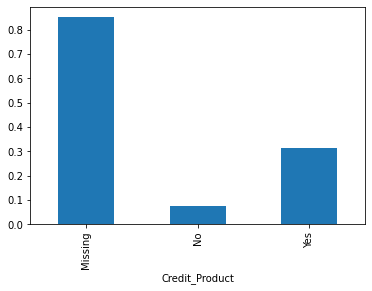

In [36]:
df_full[df_full['Is_Lead']!=-1].groupby('Credit_Product')['Is_Lead'].mean().plot.bar()

<AxesSubplot:xlabel='Is_Lead'>

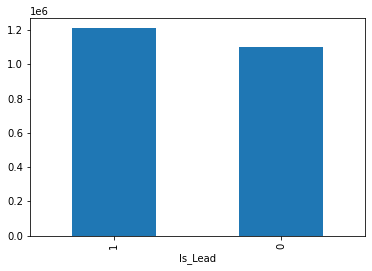

In [37]:
df_train.groupby('Is_Lead')['Avg_Account_Balance'].mean().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

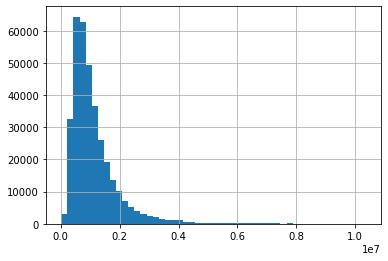

In [38]:
df_full['Avg_Account_Balance'].hist(bins=50)

<AxesSubplot:>

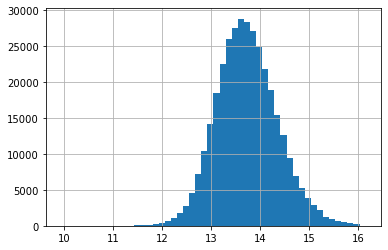

In [39]:
np.log(df_full['Avg_Account_Balance']).hist(bins=50)

<AxesSubplot:>

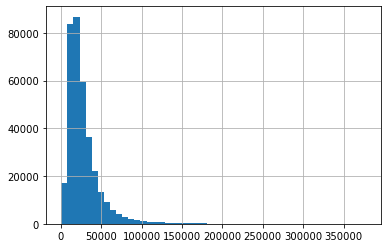

In [40]:
df_full['BalByAge'] = df_full['Avg_Account_Balance']/df_full['Age']
df_full['BalByAge'].hist(bins=50)

<AxesSubplot:>

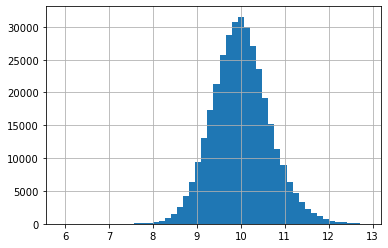

In [41]:
np.log(df_full['BalByAge']).hist(bins=50)

<AxesSubplot:>

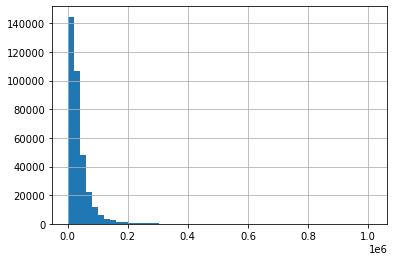

In [42]:
df_full['BalByVintage'] = df_full['Avg_Account_Balance']/df_full['Vintage']
df_full['BalByVintage'].hist(bins=50)

<AxesSubplot:>

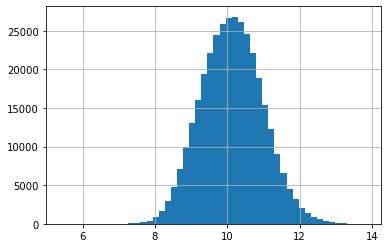

In [43]:
np.log(df_full['BalByVintage']).hist(bins=50)

In [44]:
df_full['Diff'] = df_full['Age'] - df_full['Vintage']
df_full['BalByDiff'] = df_full['Avg_Account_Balance']/df_full['Diff']
#df_full['BalByDiff'].hist(bins=50)

In [45]:
df_full['BalByDiff'].describe()

count    3.510370e+05
mean              inf
std               NaN
min     -9.172322e+06
25%     -3.452326e+04
50%      2.781729e+04
75%      9.596867e+04
max               inf
Name: BalByDiff, dtype: float64

In [46]:
df_full['VintagePerc'] = df_full['Diff']/df_full['Age']

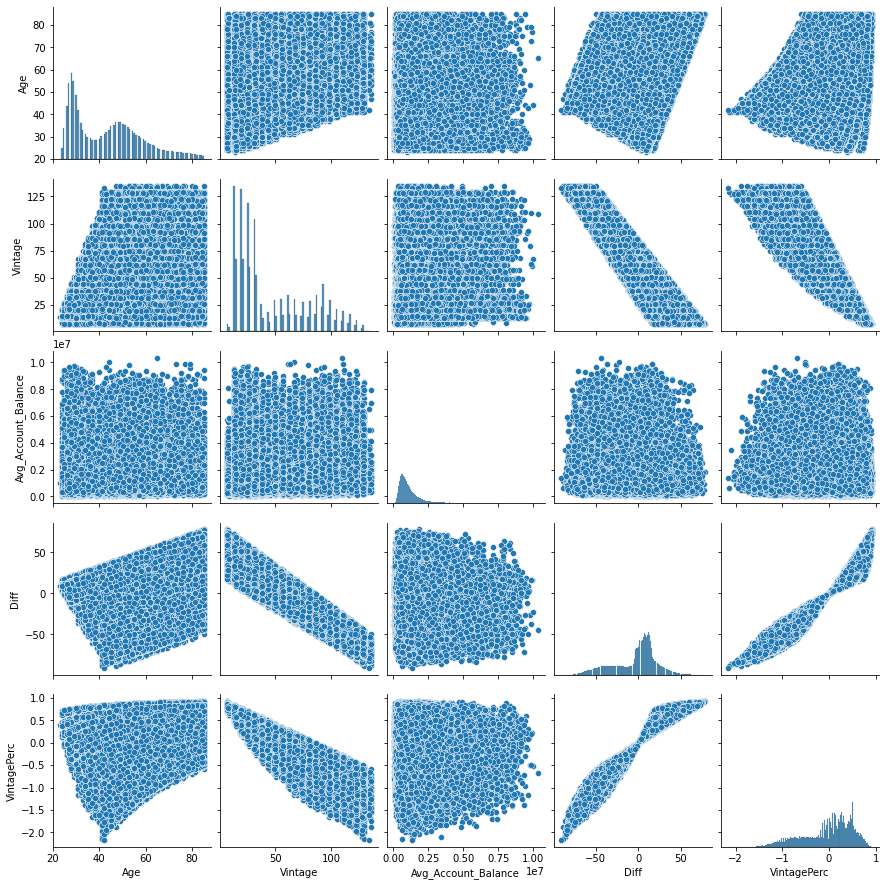

In [47]:
sns.pairplot(df_full[['Age','Vintage','Avg_Account_Balance','Diff','VintagePerc']])

<AxesSubplot:>

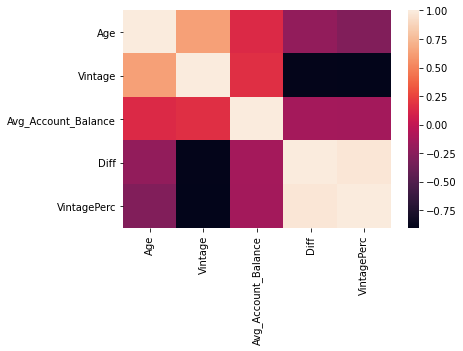

In [48]:
sns.heatmap(df_full[['Age','Vintage','Avg_Account_Balance','Diff','VintagePerc']].corr())

In [49]:
df_full[['Age','Vintage','Avg_Account_Balance','Diff','VintagePerc']].corr()

,Age,Vintage,Avg_Account_Balance,Diff,VintagePerc
Age,1.000000,0.628558,0.142563,-0.212902,-0.280505
Vintage,0.628558,1.000000,0.166611,-0.893752,-0.905641
Avg_Account_Balance,0.142563,0.166611,1.000000,-0.127087,-0.133343
Diff,-0.212902,-0.893752,-0.127087,1.000000,0.975946
VintagePerc,-0.280505,-0.905641,-0.133343,0.975946,1.000000


<AxesSubplot:xlabel='Is_Active'>

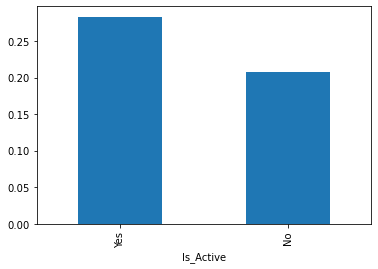

In [50]:
df_train.groupby('Is_Active')['Is_Lead'].mean().sort_values(ascending=False).plot.bar()

In [51]:
condition = df_full['Credit_Product'].isin(['Yes','Missing'])
condition_ = df_full['Is_Active'] == 'Yes'
df_full['ActiveAndCredit'] = np.where(condition & condition_,1,0)

<AxesSubplot:xlabel='ActiveAndCredit'>

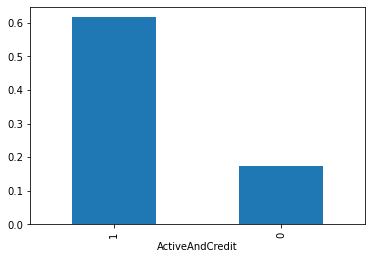

In [52]:
df_full[df_full['Is_Lead']!=-1].groupby('ActiveAndCredit')['Is_Lead'].mean().sort_values(ascending=False).plot.bar()

In [53]:
def get_label_mean_encode_maps(df_inp,df_train_inp,colname,label):
    df = df_inp.copy()
    df_tr = df_train_inp.copy()
    
    srs = pd.DataFrame(df[colname].value_counts().sort_values(ascending=False))
    srs[colname+'LabelEncode'] = [x for x in range(1,len(srs)+1)]
    label_encode_dict = srs[colname+'LabelEncode'].to_dict()
    srs = pd.DataFrame(df_tr.groupby(colname)[label].mean().sort_values(ascending=True))
    srs[colname+'MeanEncode'] = [x for x in range(1,len(srs)+1)]
    mean_encode_dict = srs[colname+'MeanEncode'].to_dict()
    
    return label_encode_dict, mean_encode_dict

In [54]:
def feature_engineering_one(df_inp,df_train_inp):
    
    df = df_inp.copy()
    df_tr = df_train_inp.copy()
    
    df['GenderEncoded'] = np.where(df['Gender']=='Male',1,0)
    df['AgeLog'] = np.log(df['Age'])
    
    #srs = pd.DataFrame(df['Region_Code'].value_counts().sort_values(ascending=False))
    #srs['RegionCodeLabelEncode'] = [x for x in range(1,len(srs)+1)]
    #label_encode_dict = srs['RegionCodeLabelEncode'].to_dict()
    #mean_encode_dict = df_tr.groupby('Region_Code')['Is_Lead'].mean().sort_values(ascending=False).to_dict()
    
    label_encode_dict, mean_encode_dict = get_label_mean_encode_maps(df_inp,df_train_inp,'Region_Code','Is_Lead')
    
    df['RegionCodeLabelEncode'] = df['Region_Code'].map(label_encode_dict)
    df['RegionCodeMeanEncode'] = df['Region_Code'].map(mean_encode_dict)
    
    label_encode_dict, mean_encode_dict = get_label_mean_encode_maps(df_inp,df_train_inp,'Occupation','Is_Lead')
    
    df['OccupationLabelEncode'] = df['Occupation'].map(label_encode_dict)
    df['OccupationMeanEncode'] = df['Occupation'].map(mean_encode_dict)
    
    label_encode_dict, mean_encode_dict = get_label_mean_encode_maps(df_inp,df_train_inp,'Channel_Code','Is_Lead')
    
    df['ChannelCodeLabelEncode'] = df['Channel_Code'].map(label_encode_dict)
    df['ChannelCodeMeanEncode'] = df['Channel_Code'].map(mean_encode_dict)
    
    df['Credit_Product'] = np.where(df['Credit_Product'].isnull(),'Missing',df['Credit_Product'])
    df_tr['Credit_Product'] = np.where(df_tr['Credit_Product'].isnull(),'Missing',df_tr['Credit_Product'])
    label_encode_dict = {"Missing":3,"Yes":2,"No":1}
    df['CreditProductEncoded'] = df['Credit_Product'].map(label_encode_dict)
    
    df['BalanceLog'] = np.log(df['Avg_Account_Balance'])
    
    
    df['ActiveEncoded'] = np.where(df['Is_Active']=='Yes',1,0)
    
    return df

In [55]:
def feature_engineering_two(df_inp,df_train_inp):
    
    df = df_inp.copy()
    df_tr = df_train_inp.copy()
    
    df['Entrepreneur'] = np.where(df['Occupation']=='Entrepreneur',1,0)
    
    df['AgeOverVintage'] = df['Age'] - df['Vintage']
    df['VintagePerc'] = df['AgeOverVintage']/df['Age']
    
    condition = df['Credit_Product'].isin(['Yes','Missing'])
    condition_ = df['Is_Active'] == 'Yes'
    df['ActiveAndCredit'] = np.where(condition & condition_,1,0)
    
    
    return df

In [56]:
df_process = feature_engineering_one(df_full,df_train)
df_process = feature_engineering_two(df_process,df_train)

In [57]:
df_process.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,...,RegionCodeMeanEncode,OccupationLabelEncode,OccupationMeanEncode,ChannelCodeLabelEncode,ChannelCodeMeanEncode,CreditProductEncoded,BalanceLog,ActiveEncoded,Entrepreneur,AgeOverVintage
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,...,33,3,2,2,4,1,13.860193,0,0,30
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,...,25,2,1,1,1,1,13.274205,0,0,-2
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,...,33,1,3,2,4,1,14.210464,1,0,30
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,...,5,2,1,1,1,1,13.061453,0,0,15
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,...,15,2,1,1,1,1,13.695360,0,0,-3


In [58]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      351037 non-null  object 
 1   Gender                  351037 non-null  object 
 2   Age                     351037 non-null  int64  
 3   Region_Code             351037 non-null  object 
 4   Occupation              351037 non-null  object 
 5   Channel_Code            351037 non-null  object 
 6   Vintage                 351037 non-null  int64  
 7   Credit_Product          351037 non-null  object 
 8   Avg_Account_Balance     351037 non-null  int64  
 9   Is_Active               351037 non-null  object 
 10  Is_Lead                 351037 non-null  int64  
 11  CreditProductMissing    351037 non-null  int32  
 12  BalByAge                351037 non-null  float64
 13  BalByVintage            351037 non-null  float64
 14  Diff                

In [59]:
df_process.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'CreditProductMissing', 'BalByAge', 'BalByVintage', 'Diff',
       'BalByDiff', 'VintagePerc', 'ActiveAndCredit', 'GenderEncoded',
       'AgeLog', 'RegionCodeLabelEncode', 'RegionCodeMeanEncode',
       'OccupationLabelEncode', 'OccupationMeanEncode',
       'ChannelCodeLabelEncode', 'ChannelCodeMeanEncode',
       'CreditProductEncoded', 'BalanceLog', 'ActiveEncoded', 'Entrepreneur',
       'AgeOverVintage'],
      dtype='object')

In [60]:
features_to_scale = [
    'Age', 
    'Vintage',
    'AgeLog',
    'Avg_Account_Balance',
    'BalanceLog',
    'AgeOverVintage', 
    'VintagePerc'
]

In [61]:
def scale_features(df_inp,features_to_scale,scaler_type='std'):
    
    df = df_inp.copy()
    
    scaler = StandardScaler()
    if scaler_type == 'min_max':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
        
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[features_to_scale]),columns = ['Scaled'+x for x in features_to_scale])
    df_final_data = pd.concat([df,df_scaled],axis=1)
    
    return df_final_data

In [62]:
df_scaled = scale_features(df_process,features_to_scale)

In [63]:
df_scaled.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,...,ActiveEncoded,Entrepreneur,AgeOverVintage,ScaledAge,ScaledVintage,ScaledAgeLog,ScaledAvg_Account_Balance,ScaledBalanceLog,ScaledAgeOverVintage,ScaledVintagePerc
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,...,0,0,30,1.963311,-0.121384,1.696878,-0.098541,0.202963,1.284795,0.821363
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,...,0,0,-2,-0.933890,-0.461633,-0.972819,-0.639654,-0.741453,0.041327,-0.088859
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,...,1,0,30,0.817906,-0.647223,0.900985,0.413296,0.767482,1.284795,1.059113
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,...,0,0,15,-0.664383,-0.863745,-0.597061,-0.769806,-1.084337,0.701919,0.878950
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,...,0,0,-3,-0.933890,-0.430701,-0.972819,-0.283976,-0.062692,0.002469,-0.152383
